# Path (경로)

- **경로(Path)**
    - 프로그램에서 사용할 **자원의 위치를 path(경로)** 라고 한다.
    - **파일 시스템**에서는 파일이나 디렉토리가 있는 위치의 경로를 말한다.
    

- **절대경로**
    - 자원의 전체 경로를 표현하는 방식
    - 시작 경로부터 자원(파일, 디렉토리)이 있는 위치까지 표현한다.
        - 시작 경로: Root Path
            - windows: `c:`, `d:`
            - Unix, Linux: `/`

- **상대경로**
    - 현재 작업 경로(위치)에서 부터 자원이 있는 위치까지 표현한다.
        - 시작 경로: 현재 작업경로
    - 구문
        - `.` : 현재 디렉토리
        - `..`: 상위 디렉토리
        - `/` : 경로 구분자,  상위경로/하위경로

- 운영체제(O/S)별 경로구분자
    - 윈도우즈: `\` (역슬래쉬)
    - 리눅스/유닉스: `/` (슬래쉬)

In [1]:
import os               # os 모듈 임포트
wd = os.getcwd()        # 현재 작업 디렉토리 경로
print(type(wd), wd)     # 경로의 자료형과 내용 출력

<class 'str'> e:\Python\PlayData_Python_AI_learning\02.program\Python


In [2]:
os.chdir(r'c:\temp')    # 작업 디렉토리 변경
os.getcwd()             # 변경된 작업 디렉토리 경로

'c:\\temp'

In [3]:
# 절대 경로
os.chdir(r'E:\Python\PlayData_Python_AI_learning\02.program\Python')
os.getcwd()

'E:\\Python\\PlayData_Python_AI_learning\\02.program\\Python'

# 입출력 (IO)

## 입출력이란
- 프로그램이 사용하려는 외부 자원을 연결하여 데이터를 입력 받거나 출력하는 작업을 IO라고 한다.
- 외부 자원
    - 파일, 원격지 컴퓨터(Network으로 연결된 컴퓨터의 자원), 데이터베이스 등.
- **Stream**
    - 입출력 시 **데이터의 흐름을 stream** 이라고 한다.
- InputStream 
    - Program이 외부로 부터 데이터를 읽어 들이는 흐름.
- OutputStream 
    - Program이 외부로 데이터를 써주는 흐름.


![io](images/ch09_01.png)

## IO 코딩 순서
![순서](images/ch09_02.png)

### 파일 열기(연결)
- open() 함수 사용
    - 연결된 파일과 입출력 메소드를 제공하는 객체(Stream)를 리턴
- 구문
    - `open(file, mode='r', encoding=None)`
    - 함수 주요 매개변수
        - file : 연결할 파일 경로
        - mode : 열기 모드
            - mode는 목적, 데이터종류를 조합한 문자열을 사용한다.
        - encoding 
            - 텍스트 파일일 경우 인코딩 방식
            - None 또는 생략하면  os 기본 encoding방식을 따른다.
                - Windows: cp949/euckr
                - Linux, Unix: utf-8
    

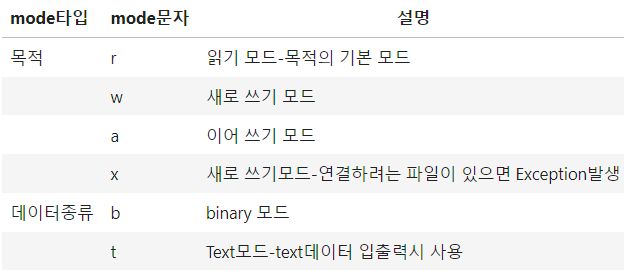

### 출력 메소드

- write(출력할 Data)
    - 연결된 파일에 `출력할 Data` 출력한다.
- writelines(문자열을 가진 컬렉션)
    - 리스트, 튜플, 집합이 원소로 가진 문자열들을 한번에 출력한다.
    - text 출력일 경우에만 사용가능.
    - 원소에 문자열 이외의 타입의 값이 있을 경우 TypeError 발생

In [4]:
# a.txt 파일에 문자열을 쓰기

# 1. a.txt 파일을 연결
# open('a.txt의 경로', 'wt', encoding='utf-8') -> 파일을 쓰기 모드로 연결,  인코딩은 utf-8 
# wt: 텍스트 파일을 새로 쓰기 모드로 연결
# fw객체: 파일을 쓰기 위한 객체
# 절대 경로
fw = open(r'E:\Python\PlayData_Python_AI_learning\02.program\Python\iotest\a.txt', 'wt')
print(type(fw))

# 2. 문자열을 쓰기
fw.write(r'https://www.google.co.kr/')
fw.write('\n')
fw.write(r'''안녕하세요.
반갑습니다.''')

# 3. 파일을 닫기
fw.close()

<class '_io.TextIOWrapper'>


In [5]:
txt = r'''asdf
가나다라마바사
1234567890'''
# 상대 경로
fw = open('.\\iotest\\b.txt', 'wt')
fw.write(txt)
fw.flush() # 버퍼에 남아있는 내용을 파일에 쓰기
fw.close()

In [6]:
os.getcwd()

'E:\\Python\\PlayData_Python_AI_learning\\02.program\\Python'

In [7]:
txt = r'''123
321
231'''
l_txt = txt.splitlines()
fw = open('.\\iotest\\c.txt', 'wt')
# 리스트 형태의 문자열을 파일에 쓰기
# writelines() 메소드는 리스트 형태의 문자열을 파일에 쓸 때 사용
# (엔터 없이 써짐)
fw.writelines(l_txt)
fw.close()

In [11]:
# aw: 텍스트 파일을 추가 모드로 연결
fw = open('.\\iotest\\c.txt', 'at')
fw.writelines(l_txt)
fw.close()

In [13]:
fw = open('.\\iotest\\d.txt', 'wt', encoding='utf-8')
str_l = '안녕 hello 1234'.split()

# for s in str_l:
#     fw.write(s)
# 반복문을 사용하지 않고 한 번에 쓰기
fw.writelines(str_l)
fw.close()

### 입력 메소드
- read() : 문자열(text mode), bytes(binary mode) 
    - 연결된 파일의 내용을 한번에 모두 읽어 들인다.
- readline() : 문자열(text mode), bytes(binary mode)
    - 한 줄만 읽는다.
    - text 입력일 경우만 사용가능
    - 읽은 라인이 없으면 `None`을 리턴한다.
- readlines() : 리스트
    - 한번에 다 읽은 뒤 각각의 라인을 리스트에 원소로 담아 반환한다.
- Input Stream (TextIOWrapper, BufferedReader)는 Iterable 타입
    - for문을 이용한 라인단위 순차 조회할 수 있다.

In [47]:
memo = open('.\\iotest\\c.txt', 'rt')   # 파일을 읽기 모드로 연결
l_txt = memo.readlines()                # 파일의 내용을 한 줄씩 읽어서 리스트에 저장
# print(*l_txt, sep='') 
for i, t in enumerate(l_txt, start=1):  # 리스트의 내용을 출력
    print(f'{i:2d}| {t}', end='')
memo.close()                            # 파일을 닫기

memo = open('.\\iotest\\c.txt', 'wt')   # 파일을 쓰기 모드로 연결
while True:
    t = input('메모를 입력하세요: ')     # 키보드로 입력한 내용을 t에 저장
    if t == '!q':                       # 입력한 내용이 !q이면 반복문을 빠져나감
        break
    print(t)
    l_txt.append('\n' + t)                     # 입력한 내용을 리스트에 추가
for t in l_txt:                         # 리스트의 내용을 파일에 쓰기
    memo.write(t)
memo.close()                            # 파일을 닫기

 1| 1233212311233
 2| 21231123321231123321231
 3| asdjbkasdjb
 4| qwieqwoudtgasdl
 5| sajkdnjk
 6| 189239
 7| 하이
 8| 안녕
 9| hello
10| im fine Thack you
11| ?
12| 1!
13| adssda
14| sdafasdf
15| fasdfasfafqwfdr
16| asfafqwfdr
17| asd
18| sad
19| sad123ㅂ1
20| 123
21| 456
22| wqedw
23| 1
24| 1
25| 1
26| hand-on
27| 핸즈온
28| !ㅂ

In [33]:
# 파일을 읽기 모드로 연결
fr = open('.\\iotest\\b.txt', 'rt', encoding='utf-8')
# 파일의 내용을 읽어서 result에 저장 
result = fr.read()                  
print(result) 
# 파일을 닫기
fr.close()                          

asdf
가나다라마바사
1234567890


In [27]:
# 파일을 읽기 모드로 연결
fr = open('.\\iotest\\b.txt', 'rt', encoding='cp949')
# 파일의 내용을 읽어서 result에 저장 
result = fr.read()                  
print(result) 
# 파일을 닫기
fr.close()                          

UnicodeDecodeError: 'cp949' codec can't decode byte 0x80 in position 8: illegal multibyte sequence

In [36]:
fr = open('.\\iotest\\b.txt')

result = fr.readline() # 파일의 내용을 한 줄씩 읽어서 result에 저장 (엔터 포함)
print(result)
result = fr.readline()
print(result)
result = fr.readline()
print(result)
result = fr.readline() # 파일의 끝에 도달하면 빈 문자열을 반환
print(result)
fr.close()

asdf

가나다라마바사

1234567890



In [37]:
fr = open('.\\iotest\\b.txt')
result = fr.readlines() # 파일의 전체 내용을 한 줄씩 리스트에 저장
print(*result, sep='')
fr.close()

asdf
 가나다라마바사
 1234567890


In [43]:
fr = open('.\\iotest\\b.txt')
print(type(fr), fr.mode)
for i, t in enumerate(fr, start=1):
    print(f'{i}|{t}', end='')
fr.close()

<class '_io.TextIOWrapper'> r
1|asdf
2|가나다라마바사
3|1234567890

In [51]:
try: 
    # fr_ 을 None으로 초기화
    fr_ = None
    # 파일을 읽기 모드로 연결
    fr_ = open('.\\iotest\\x.txt', 'rt', encoding='utf-8')
    print(fr_)
except Exception as e:
    # 예외가 발생하면 예외 내용을 출력
    print(e)
finally:
    # 예외 발생 여부와 상관없이
    # 파일이 열려 있으면 파일을 닫음
    if fr_:
        fr_.close()

[Errno 2] No such file or directory: '.\\iotest\\x.txt'


NameError: name 'fr_' is not defined

## with block

파일과 입출력 작업이 다 끝나면 반드시 연결을 닫아야 한다. 매번 연결을 닫는 작업을 하는 것이 번거롭고 실수로 안 닫을 경우 문제가 생길 수 있다. **with block은 block을 벗어나면 자동으로 연결을 닫아 준다.** 그래서 연결을 닫는 코드를 생략할 수 있다.

- 구문
```python
with open() as 변수: # `변수`는 open()이 반환하는 Stream객체를 참조한다.
    입출력 작업      # 변수를 이용해 입출력 작업을 처리한다.
# with block을 빠져 나오면 close()가 자동으로 실행된다.
```

In [55]:
fr = open('.\\iotest\\b.txt', 'rt', encoding='utf-8')
print(*fr, sep='')
fr.close()

asdf
가나다라마바사
1234567890


In [57]:
# 위쪽 코드를 아래와 같이 with문을 사용하여 간단하게 작성 가능
# 오류로 close()를 호출하지 않아도 자동으로 파일을 닫음
with open('.\\iotest\\b.txt', 'rt', encoding='utf-8') as fr:
    print(fr.closed)
    print(*fr, sep='')
print(fr.closed)

False
asdf
가나다라마바사
1234567890
True


In [ ]:
class MyContextManager:
    def __init__(self):
        print('init : 객체 생성시 호출')
        
    def __enter__(self):
        print('enter : with block에 진입했을 때 호출')
        return self
    
    def __exit__(self, exc_type, exc_value, exc_traceback):
        # 파라미터들을 with block 구문에서 Exception 발생시
        # Exception 정보를 담고 있는 객체들을 전달받음
        print('exit : with block을 빠져나오기 직전에 호출')

In [ ]:
with MyContextManager() as mng:
    print('with block의 실행 코드')

init : 객체 생성시 호출
enter : with block에 진입했을 때 호출
with block의 실행 코드
exit : with block을 빠져나오기 직전에 호출


In [6]:
class FileContextManager:
    def __init__(self, file_path, mode = 'rt', enmocing = 'utf-8'):
        self.file_path = file_path
        self.mode = mode
        self.encoding = enmocing
    
    def __enter__(self):
        self.stream = open(self.file_path, self.mode, self.encoding)
        return self.stream
    
    def __exit__(self, exc_type, exc_value, exc_traceback):
        self.stream.close()
    

In [7]:
with FileContextManager('test.txt') as fr:
    txt = fr.read()

TypeError: 'str' object cannot be interpreted as an integer

In [1]:
# 정수, 실수, 객체, ...... (str을 제외한 모든 타입) 을 출력하기 위해서는 
# bytes 타입으로 변환한다.
# 변환된 bytes 값을 출력한다.


# 저장된 bytes 값을 읽어들이기.
# 읽으면 bytes 타입의 값으로 읽어온다.
# 읽어온 bytes 타입 값을 원래 타입으로 변환 한 뒤 사용.

In [9]:
data = 10 # int
# int -> bytes

# 1 : length -> 정수중 저장하려는 크기 (1 byte)
# little: byteorder -> 1010 -> 00001010 (유효한 데이터가 뒤에 있음)
# big   : byteorder -> 1010 -> 10100000 (유효한 데이터가 앞에 있음)
# signed : 부호가 있는 정수 (음수, 양수) -> True
# unsigned : 부호가 없는 정수 (양수) -> False
bytes_data = data.to_bytes(1, byteorder='little', signed=True)

with open('.\\iotest\\int_data.bin', 'wb') as fw:
    fw.write(bytes_data)

In [11]:
# 읽기
with open('.\\iotest\\int_data.bin', 'rb') as fr:
    bytes_data = fr.read()
    print(bytes_data, type(bytes_data))
    
    # bytes -> int로 변환
    data = int.from_bytes(bytes_data, byteorder='little', signed=True)
    print(data, type(data))

b'\n' <class 'bytes'>
10 <class 'int'>


In [13]:
# 객체마다 변환과정의 불편함을 해결하기 위해 pickle 모듈을 사용한다.

# pickle 모듈을 이용한 객체 직렬화

## 객체 직렬화(Object Serialization)
- 객체의 속성값들을 bytes로 변환해 출력하는 것을 객체 직렬화(Object Serialization) 이라고 한다.
- bytes로 출력된 데이터를 읽어 객체화 하는 것을 객체 역직렬화(Object Deserialization) 이라고 한다.

### pickle
- 객체 파일 입출력을 위한 파이썬 모듈
- open() 시 **binary mode**로 설정한다.
- 저장시 파일 확장자는 보통 `pkl` 이나 `pickle` 로 한다.
- ex)
```python
fw = open("data.pkl", "wb") # 객체를 pickle에 저장하기 위한 output stream 생성
fr = open("data.pkl", "rb") # 파일에 저장된 객체를 읽어오기 위한 input stream 생성
```
- **메소드**
    - dump(저장할 객체, fw) : 출력
    - load(fr): 입력 - 읽은 객체를 반환한다.

In [1]:
import pickle

In [2]:
num = 10
with open('.\\iotest\\int_data.pkl', 'wb') as fw:
    # 출력
    # pickle.dump(출력할 값, 파일객체)
    pickle.dump(num, fw)

In [3]:
with open('.\\iotest\\int_data.pkl', 'rb') as fr:
    num = pickle.load(fr)
    print(num, type(num))

10 <class 'int'>


In [7]:
class Person:
    
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def __str__(self):
        return f"name: {self.name}, age: {self.age}"

In [8]:
p = Person('홍길동', 20)
print(p)

name: 홍길동, age: 20


In [11]:
with open('.\\iotest\\person_data.pkl', 'wb') as fw:
    pickle.dump(p, fw)

In [15]:
with open('.\\iotest\\person_data.pkl', 'rb') as fr:
    p = pickle.load(fr)
    print(p, type(p))

name: 홍길동, age: 20 <class '__main__.Person'>


In [16]:
l = [Person('홍길동', 20), Person('김철수', 30), Person('박영희', 40)]
with open('.\\iotest\\person_list.pkl', 'wb') as fw:
    pickle.dump(l, fw)

In [18]:
with open('.\\iotest\\person_list.pkl', 'rb') as fr:
    l = pickle.load(fr)
    print(l, type(l))
    for p in l:
        print(p, type(p))

[<__main__.Person object at 0x000002DD5864AB30>, <__main__.Person object at 0x000002DD58653430>, <__main__.Person object at 0x000002DD58652680>] <class 'list'>
name: 홍길동, age: 20 <class '__main__.Person'>
name: 김철수, age: 30 <class '__main__.Person'>
name: 박영희, age: 40 <class '__main__.Person'>


In [1]:
%%writefile .\\mypackage\\person_class.py

class Person:
    
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def __str__(self):
        return f"name: {self.name}, age: {self.age}"

Overwriting .\\mypackage\\person_class.py


In [3]:
from mypackage.person_class import Person
import pickle

In [4]:
l = [Person('홍길동', 20), Person('김철수', 30), Person('박영희', 40)]
with open('.\\iotest\\person_list.pkl', 'wb') as fw:
    pickle.dump(l, fw)

In [5]:
with open('.\\iotest\\person_list.pkl', 'rb') as fr:
    l = pickle.load(fr)
    print(l, type(l))
    for p in l:
        print(p, type(p))

[<mypackage.person_class.Person object at 0x000001E4677277C0>, <mypackage.person_class.Person object at 0x000001E4676FAB90>, <mypackage.person_class.Person object at 0x000001E467742EF0>] <class 'list'>
name: 홍길동, age: 20 <class 'mypackage.person_class.Person'>
name: 김철수, age: 30 <class 'mypackage.person_class.Person'>
name: 박영희, age: 40 <class 'mypackage.person_class.Person'>


# TODO

- 간단한 터미널 기반 메모장
    1. 사용자로부터 파일명을 입력받는다.
    2. 사용자로부터 파일에 저장할 문장을 입력받아서 파일에 저장한다.
        - 한줄씩 입력받는다.
        - 사용자가 !q 를 입력하면 저장후 종료한다.
    3. 사용자가 저장한 파일을 읽어서 출력한다.


In [2]:
file_name = input('파일 이름을 입력하세요: ')
lines = []
with open(f'.\\iotest\\{file_name}.txt', 'wt', encoding='utf-8') as memo:
    while True:
        line = input('메모를 입력하세요: ')
        if line == '!q':
            break
        lines.append(line + '\n')
        print(f'입력 :{line}')
    memo.writelines(lines)
    
with open(f'.\\iotest\\{file_name}.txt', 'rt', encoding='utf-8') as memo:
    for i, t in enumerate(memo, start=1):
        print(f'{i:2d} |{t}', end='')


입력 :hi
입력 :my name is Kim
입력 :bye
 1 |hi
 2 |my name is Kim
 3 |bye


In [13]:
import pickle

In [14]:
file_name = input('파일 이름을 입력하세요: ')

with open(f'.\\iotest\\{file_name}.pkl', 'wb') as fw:
    lines = []
    while True:
        line = input('메모를 입력하세요: ')
        if line == '!q':
            break
        lines.append(line + '\n')
    pickle.dump(lines, fw)

with open(f'.\\iotest\\{file_name}.pkl', 'rb') as fr:
    lines = pickle.load(fr)
    for i, t in enumerate(lines, start=1):
        print(f'{i:2d} |{t}', end='')
        

 1 |hi
 2 |my name is Kim
 3 |


- member.csv 파일을 읽어서 각 열의 값을 배열에 담는다.    
이름,나이,주소  형태의 csv를 읽어    
```python
names = []
ages =[]
address =[]    
```
배열에 넣는다. 
    - 단 첫줄은 head이므로 읽지 않는다.
    - 참고 함수: 문자열 split(), for문 관련 enumerate()



> **CSV (Comma Separated Value)** 파일
> - 데이터들을 정형화(표)된 형태로 텍스트파일에 저장하는 방식
> - 하나의 데이터는 한줄에 표시. (데이터 구분자는 엔터)
> - 하나의 데이터를 구성하는 값들(속성)들은 , 로 구분
>     - tab으로 구분하는 경우 TSV 
>     - 각 속성값들은 " " 로 감싸기도 한다.
> - 텍스트기반
> - 파일 확장자는 `.csv`, `.tsv` 로 준다.